<a href="https://colab.research.google.com/github/orlandokohjy/NTUC_datascience/blob/main/NTUC_Motor_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning model prediction on motor insurance renewal

In [3]:
!ls

sample_data


In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
%cd /gdrive

/gdrive


In [16]:
# Standard import
import os as os
import pandas as pd
import numpy as np

df_test = pd.read_csv('/gdrive/Othercomputers/My MacBook Pro/KJY/Data Science/DSCaseStudy/test.csv')
df_train = pd.read_csv('/gdrive/Othercomputers/My MacBook Pro/KJY/Data Science/DSCaseStudy/train.csv')

In [17]:
df_train

,cust_id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,days_since_insured,response
0,167647,Male,22,1,7.0,1,< 1 Year,No,52.6,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,866.5,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,716.8,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,552.9,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,580.5,152.0,211,0
...,...,...,...,...,...,...,...,...,...,...,...,...
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,478.8,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,6727.9,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,808.9,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,507.6,152.0,208,0


In [18]:
# Check on categorical variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cust_id               382154 non-null  int64  
 1   gender                382154 non-null  object 
 2   age                   382154 non-null  int64  
 3   driving_license       382154 non-null  int64  
 4   region_code           382154 non-null  float64
 5   previously_insured    382154 non-null  int64  
 6   vehicle_age           382154 non-null  object 
 7   vehicle_damage        382154 non-null  object 
 8   annual_premium        382154 non-null  float64
 9   policy_sales_channel  382154 non-null  float64
 10  days_since_insured    382154 non-null  int64  
 11  response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [22]:
# Check on missing values
df_train.isna().sum()

cust_id                 0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
days_since_insured      0
response                0
dtype: int64

In [ ]:
# Categorize 'vehicle_age' and 'vehicle_

In [23]:
# Setup random seed
np.random.seed(42)

# To create X (predictors)
X_train = df_train.drop('response',axis = 1)

# To create y (response)
y_train = df_train['response']

In [24]:
# To convert categorical variables to numerical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_var = ['gender', 'vehicle_age', 'vehicle_damage']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_var)],
                                remainder = 'passthrough')
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_train

array([[  0. ,   1. ,   0. , ...,  52.6, 152. ,  16. ],
       [  0. ,   1. ,   1. , ..., 866.5,  26. , 135. ],
       [  1. ,   0. ,   1. , ..., 716.8, 124. , 253. ],
       ...,
       [  0. ,   1. ,   1. , ..., 808.9,  26. , 187. ],
       [  1. ,   0. ,   0. , ..., 507.6, 152. , 208. ],
       [  1. ,   0. ,   0. , ..., 607.9, 152. , 104. ]])

In [ ]:
# Split the train data into training and test sets (to evaluate on the model accuracy)
from sklearn.model_selection import train_test_split
X_train, X_split_test, y_train, y_split_test = train_test_split(transformed_X_train,
                                                                y_train,
                                                                test_size = 0.2)

# To predict with random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_split_test, y_split_test)

In [26]:
model.score(X_split_test, y_split_test)

0.89293611231045

In [29]:
# Try different numbers of estimators
np.random.seed(42)
for i in range(10, 100, 10):
  print('Trying model with {} estimators'.format(i))
  model = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
  print('Model accuracy on test set: {}%'.format(model.score(X_split_test, y_split_test)*100))
  print('')

Trying model with 10 estimators
Model accuracy on test set: 88.98745273514673%

Trying model with 20 estimators
Model accuracy on test set: 89.12483154740877%

Trying model with 30 estimators
Model accuracy on test set: 89.09343067603459%

Trying model with 40 estimators
Model accuracy on test set: 89.22688437937487%

Trying model with 50 estimators
Model accuracy on test set: 89.27791079535791%

Trying model with 60 estimators
Model accuracy on test set: 89.29884470960737%

Trying model with 70 estimators
Model accuracy on test set: 89.31323677565386%

Trying model with 80 estimators
Model accuracy on test set: 89.32632047205976%

Trying model with 90 estimators
Model accuracy on test set: 89.35248786487159%



In [30]:
# Using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5)

array([0.89475836, 0.89292665, 0.89484013, 0.89367722, 0.89449496])

In [42]:
# Work on the given test set
df_test

,cust_id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,days_since_insured
0,57782,Female,34,1,39.0,1,1-2 Year,No,764.9,124.0,146
1,286811,Female,55,1,28.0,0,> 2 Years,Yes,751.5,122.0,109
2,117823,Male,39,1,28.0,1,1-2 Year,No,491.6,26.0,63
3,213992,Male,28,1,50.0,1,1-2 Year,No,810.1,8.0,129
4,324756,Female,24,1,10.0,0,< 1 Year,Yes,735.7,152.0,201
...,...,...,...,...,...,...,...,...,...,...,...
78268,847,Male,43,1,39.0,0,1-2 Year,Yes,52.6,124.0,26
78269,417524,Female,21,1,12.0,1,< 1 Year,No,658.7,152.0,185
78270,188087,Male,48,1,29.0,1,1-2 Year,No,704.9,124.0,101
78271,215680,Male,64,1,5.0,1,1-2 Year,No,514.1,26.0,86


In [37]:
# Check on categorical variables and missing values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78273 entries, 0 to 78272
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cust_id               78273 non-null  int64  
 1   gender                78273 non-null  object 
 2   age                   78273 non-null  int64  
 3   driving_license       78273 non-null  int64  
 4   region_code           78273 non-null  float64
 5   previously_insured    78273 non-null  int64  
 6   vehicle_age           78273 non-null  object 
 7   vehicle_damage        78273 non-null  object 
 8   annual_premium        78273 non-null  float64
 9   policy_sales_channel  78273 non-null  float64
 10  days_since_insured    78273 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 6.6+ MB


In [33]:
# Assign X to test set
X_test = df_test

In [43]:
# To convert categorical variables to numerical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_var = ['gender', 'vehicle_age', 'vehicle_damage']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_var)],
                                remainder = 'passthrough')
transformed_X_test = transformer.fit_transform(X_test)
transformed_X_test

array([[  1. ,   0. ,   1. , ..., 764.9, 124. , 146. ],
       [  1. ,   0. ,   0. , ..., 751.5, 122. , 109. ],
       [  0. ,   1. ,   1. , ..., 491.6,  26. ,  63. ],
       ...,
       [  0. ,   1. ,   1. , ..., 704.9, 124. , 101. ],
       [  0. ,   1. ,   1. , ..., 514.1,  26. ,  86. ],
       [  1. ,   0. ,   0. , ..., 555. , 152. , 235. ]])

In [57]:
# Predict using previous trained model
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.predict(transformed_X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
propensity = clf.predict_proba(transformed_X_test)

In [59]:
propensity = propensity[:,1]

In [60]:
df_test['propensity'] = propensity

In [63]:
output = df_test[['cust_id','propensity']]

In [ ]:
output.to_csv('KJY_submission', index = False)

# Data visualization on train set

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df_train['vehicle_damage'].unique()

array(['No', 'Yes'], dtype=object)

In [69]:
# Need to change categorical variables to numerical variables
df_train.loc[df_train['gender'] == 'Male', 'gender'] = 1
df_train.loc[df_train['gender'] == 'Female', 'gender'] = 0
df_train.loc[df_train['vehicle_age'] == '< 1 Year', 'vehicle_age'] = 0
df_train.loc[df_train['vehicle_age'] == '1-2 Year', 'vehicle_age'] = 1
df_train.loc[df_train['vehicle_age'] == '> 2 Years', 'vehicle_age'] = 2
df_train.loc[df_train['vehicle_damage'] == 'Yes', 'vehicle_damage'] = 1
df_train.loc[df_train['vehicle_damage'] == 'No', 'vehicle_damage'] = 0

In [77]:
df_train = df_train.apply(pd.to_numeric, errors = 'coerce')

In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cust_id               382154 non-null  int64  
 1   gender                382154 non-null  int64  
 2   age                   382154 non-null  int64  
 3   driving_license       382154 non-null  int64  
 4   region_code           382154 non-null  float64
 5   previously_insured    382154 non-null  int64  
 6   vehicle_age           382154 non-null  int64  
 7   vehicle_damage        382154 non-null  int64  
 8   annual_premium        382154 non-null  float64
 9   policy_sales_channel  382154 non-null  float64
 10  days_since_insured    382154 non-null  int64  
 11  response              382154 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 35.0 MB


Text(0.5, 1.0, 'Correlation Heatmap')

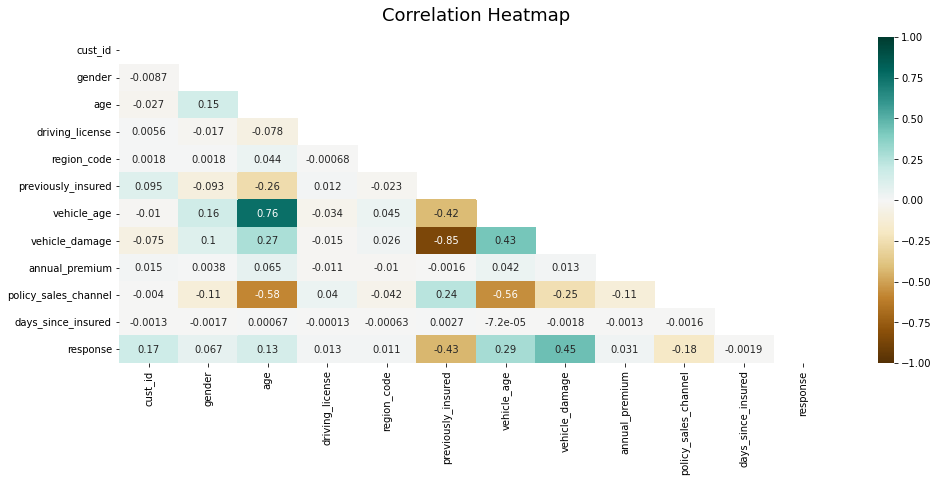

In [79]:
# Correlation matrix
plt.figure(figsize = (16,6))

mask = np.triu(np.ones_like(df_train.corr(), dtype = np.bool))

heatmap = sns.heatmap(df_train.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':18}, pad = 16)

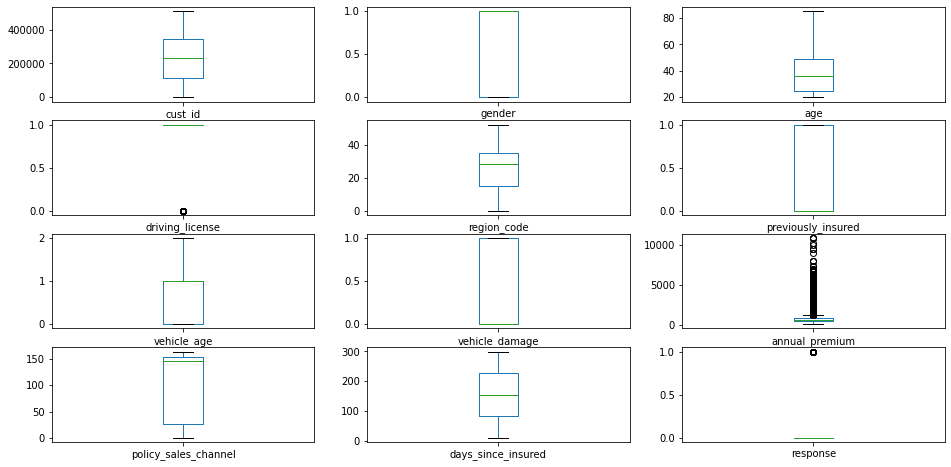

In [80]:
# Boxplot for train set
df_train.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (16,8))
plt.show()

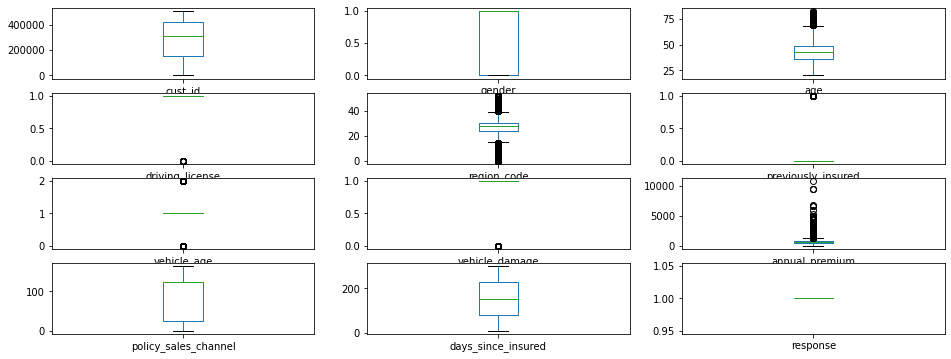

In [84]:
# Boxplot for response = 1
df_train_renew = df_train[df_train['response'] == 1]
df_train_renew.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (16,6))
plt.show()